# Feature Engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Creating 4 Sentiment Features

In [2]:
tweets_bert = pd.read_csv('./data/tweets_bert.csv', index_col= 0).set_index('source')
tweets_countvect = pd.read_csv('./data/tweets_sentiment_countvect.csv', index_col= 0).set_index('source')
tweets_vader = pd.read_csv('./data/tweets_sentiment_vader.csv', index_col= 0).set_index('source')
tweets_tfidf = pd.read_csv('./data/tweets_tfidf.csv', index_col= 0).set_index('source')

In [3]:
sales = pd.read_csv('./data/sales.csv')
tweets = pd.read_csv('./data/tweets.csv', index_col= 0)

In [4]:
tweets = tweets.set_index('source')

In [5]:
tweets_bert['sentiment_bert'] = tweets_bert['sentiment']
tweets_bert['sentiment_tfidf'] = tweets_tfidf['sentiment']
tweets_bert['sentiment_vader'] = tweets_vader['sentiment']
tweets_bert['sentiment_countvect'] = tweets_countvect['sentiment']

In [6]:
tweets = tweets_bert[~tweets_bert['sentiment'].isna()].reset_index()

In [7]:
tweets_bert

,url,date,content,id,user,outlinks,tcooutlinks,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,mentionedUsers,device,sentiment,sentiment_bert,sentiment_tfidf,sentiment_vader,sentiment_countvect
source,,,,,,,,,,,,,,,,,,,,,
"<a href=""http://itunes.apple.com/us/app/twitter/id409789998?mt=12"" rel=""nofollow"">Twitter for Mac</a>",https://twitter.com/lundp/status/1547135712536...,2012-01-04 23:59:24+00:00,Trying new iSkin protector on MacBook Pro. And...,154713571253686272,https://twitter.com/lundp,[],[],0.0,0.0,0,...,NaN,NaN,NaN,NaN,mac,-1.0,-1.0,0.0,-1.0,-1.0
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/JayDCooke/status/154713564...,2012-01-04 23:59:22+00:00,I'm ready to get on the #MacBook,154713564031090689,https://twitter.com/JayDCooke,[],[],0.0,0.0,0,...,NaN,NaN,NaN,NaN,mac,0.0,0.0,0.0,1.0,0.0
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",https://twitter.com/Semhar/status/154713498935...,2012-01-04 23:59:07+00:00,Syncing my entire life. All my personal & DAWN...,154713498935496704,https://twitter.com/Semhar,[],[],0.0,0.0,0,...,NaN,NaN,NaN,NaN,mac,-1.0,-1.0,-1.0,-1.0,-1.0
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",https://twitter.com/JRizAnti_Tweets/status/154...,2012-01-04 23:59:04+00:00,@MsSweetShay87 yup this year i asked 4 an audi...,154713487900291074,https://twitter.com/JRizAnti_Tweets,[],[],2.0,0.0,0,...,NaN,NaN,NaN,NaN,mac,0.0,0.0,0.0,1.0,-1.0
"<a href=""http://www.cloudhopper.com/"" rel=""nofollow"">Twitter SMS</a>",https://twitter.com/laurengrumpy/status/154713...,2012-01-04 23:58:50+00:00,@comptonasswoo MacBook! I'm considering buying...,154713429821751296,https://twitter.com/laurengrumpy,[],[],1.0,0.0,0,...,NaN,NaN,NaN,"[User(username='Comptonasswoo', displayname='C...",mac,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/peterdiseth/status/1080613...,2019-01-02 23:56:28+00:00,"@riogreyhound If you have an iPhone, you go in...",1080613828214358016,https://twitter.com/peterdiseth,[],[],1.0,0.0,2,...,NaN,NaN,NaN,"[User(username='riogreyhound', displayname='Tr...",iphone,0.0,0.0,0.0,1.0,0.0
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",https://twitter.com/SpeakingBee/status/1080613...,2019-01-02 23:56:27+00:00,@joshtpm @gruber I'd upgrade mine if Apple cou...,1080613826624610305,https://twitter.com/SpeakingBee,[],[],1.0,0.0,2,...,NaN,NaN,NaN,"[User(username='joshtpm', displayname='Josh Ma...",iphone,1.0,1.0,0.0,1.0,0.0
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/cubious/status/10806137853...,2019-01-02 23:56:17+00:00,@paulmasonnews My iphone 4 is still beautiful ...,1080613785327542272,https://twitter.com/cubious,[],[],0.0,0.0,0,...,NaN,NaN,NaN,"[User(username='paulmasonnews', displayname='P...",iphone,1.0,1.0,1.0,1.0,1.0


## Aggregating Features

In [8]:
sales['QTR_IDX'] = sales['Quarter'].apply(lambda x: str(20) + x[-2:] + "_" +  x[0])

In [9]:
sales['QTR_IDX']

0     2012_1
1     2012_2
2     2012_3
3     2012_4
4     2013_1
5     2013_2
6     2013_3
7     2013_4
8     2014_1
9     2014_2
10    2014_3
11    2014_4
12    2015_1
13    2015_2
14    2015_3
15    2015_4
16    2016_1
17    2016_2
18    2016_3
19    2016_4
20    2017_1
21    2017_2
22    2017_3
23    2017_4
24    2018_1
25    2018_2
26    2018_3
27    2018_4
Name: QTR_IDX, dtype: object

In [12]:
import datetime as dt
import numpy as n

tweets['date'] = pd.to_datetime(tweets['date'], format='%Y.%m.%d %H:%M:%S.%f')


In [13]:
tweets['year'] = tweets['date'].dt.year
tweets = tweets[tweets.year != 2019]

In [14]:
tweets['QTR_IDX'] = tweets['year'].astype('str').str.cat(tweets['date'].dt.quarter.astype(str), "_")

In [15]:
tweets.head()

,source,url,date,content,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quotedTweet,mentionedUsers,device,sentiment,sentiment_bert,sentiment_tfidf,sentiment_vader,sentiment_countvect,year,QTR_IDX
0,"<a href=""http://itunes.apple.com/us/app/twitte...",https://twitter.com/lundp/status/1547135712536...,2012-01-04 23:59:24+00:00,Trying new iSkin protector on MacBook Pro. And...,154713571253686272,https://twitter.com/lundp,[],[],0.0,0.0,...,NaN,NaN,mac,-1.0,-1.0,0.0,-1.0,-1.0,2012,2012_1
1,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/JayDCooke/status/154713564...,2012-01-04 23:59:22+00:00,I'm ready to get on the #MacBook,154713564031090689,https://twitter.com/JayDCooke,[],[],0.0,0.0,...,NaN,NaN,mac,0.0,0.0,0.0,1.0,0.0,2012,2012_1
2,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",https://twitter.com/Semhar/status/154713498935...,2012-01-04 23:59:07+00:00,Syncing my entire life. All my personal & DAWN...,154713498935496704,https://twitter.com/Semhar,[],[],0.0,0.0,...,NaN,NaN,mac,-1.0,-1.0,-1.0,-1.0,-1.0,2012,2012_1
3,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",https://twitter.com/JRizAnti_Tweets/status/154...,2012-01-04 23:59:04+00:00,@MsSweetShay87 yup this year i asked 4 an audi...,154713487900291074,https://twitter.com/JRizAnti_Tweets,[],[],2.0,0.0,...,NaN,NaN,mac,0.0,0.0,0.0,1.0,-1.0,2012,2012_1
4,"<a href=""http://www.cloudhopper.com/"" rel=""nof...",https://twitter.com/laurengrumpy/status/154713...,2012-01-04 23:58:50+00:00,@comptonasswoo MacBook! I'm considering buying...,154713429821751296,https://twitter.com/laurengrumpy,[],[],1.0,0.0,...,NaN,"[User(username='Comptonasswoo', displayname='C...",mac,0.0,0.0,0.0,0.0,0.0,2012,2012_1


In [16]:
tweets.columns

Index(['source', 'url', 'date', 'content', 'id', 'user', 'outlinks',
       'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'sourceUrl', 'sourceLabel', 'media',
       'retweetedTweet', 'quotedTweet', 'mentionedUsers', 'device',
       'sentiment', 'sentiment_bert', 'sentiment_tfidf', 'sentiment_vader',
       'sentiment_countvect', 'year', 'QTR_IDX'],
      dtype='object')

In [17]:
import numpy as np

In [18]:
df = tweets[['date', 'content', 'user', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount','QTR_IDX','device','sentiment_vader','sentiment_tfidf', 'sentiment_countvect', 'sentiment_bert']]
df.likeCount = df.likeCount.astype('float')
df.quoteCount = df.quoteCount.astype('float')


df_stats1 = df.groupby(['QTR_IDX', 'device']).sum()
df_stats2 = df.groupby(['QTR_IDX','device']).mean()
df_stats3 = df.groupby(['QTR_IDX','device']).user.count()

df_stats = df_stats1.merge(df_stats2, left_index=True, right_index=True, suffixes=('_sum', '_mean'))
#df_stats = df_stats.apply(lambda x: np.log(x) if x.max() >10 else x)
df_stats[df_stats<0] = 0


C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
df_stats['count'] = df.groupby(['QTR_IDX','device']).user.count()

In [20]:
abs(df.groupby(['QTR_IDX','device']).apply(lambda x: x[x['sentiment_vader'] == -1]['sentiment_vader'].sum()))

QTR_IDX  device
2012_1   ipad      132.0
         iphone    191.0
         mac       135.0
2012_2   ipad      140.0
         iphone    194.0
                   ...  
2018_3   iphone    190.0
         mac       203.0
2018_4   ipad      156.0
         iphone    170.0
         mac       176.0
Length: 84, dtype: float64

In [21]:
df_stats['vader_pos_count'] = df.groupby(['QTR_IDX','device']).apply(lambda x: x[x['sentiment_vader'] == 1]['sentiment_vader'].sum())
df_stats['bert_pos_count'] = df.groupby(['QTR_IDX','device']).apply(lambda x: x[x['sentiment_bert'] == 1]['sentiment_bert'].sum())
df_stats['tfidf_pos_count'] = df.groupby(['QTR_IDX','device']).apply(lambda x: x[x['sentiment_tfidf'] == 1]['sentiment_tfidf'].sum())
df_stats['countvect_pos_count'] = df.groupby(['QTR_IDX','device']).apply(lambda x: x[x['sentiment_countvect'] == 1]['sentiment_countvect'].sum())


df_stats['vader_pos_perc'] = df_stats['vader_pos_count']/df_stats['count']
df_stats['bert_pos_perc'] = df_stats['bert_pos_count']/df_stats['count']
df_stats['tfidf_pos_perc'] = df_stats['tfidf_pos_count']/df_stats['count']
df_stats['countvect_pos_perc'] = df_stats['countvect_pos_count']/df_stats['count']

df_stats['vader_neg_count'] = abs(df.groupby(['QTR_IDX','device']).apply(lambda x: x[x['sentiment_vader'] == -1]['sentiment_vader'].sum()))
df_stats['bert_neg_count'] = abs(df.groupby(['QTR_IDX','device']).apply(lambda x: x[x['sentiment_bert'] == -1]['sentiment_bert'].sum()))
df_stats['tfidf_neg_count'] = abs(df.groupby(['QTR_IDX','device']).apply(lambda x: x[x['sentiment_tfidf'] == -1]['sentiment_tfidf'].sum()))
df_stats['countvect_neg_count'] = abs(df.groupby(['QTR_IDX','device']).apply(lambda x: x[x['sentiment_countvect'] == -1]['sentiment_countvect'].sum()))


df_stats['vader_neg_perc'] = df_stats['vader_neg_count']/df_stats['count']
df_stats['bert_neg_perc'] = df_stats['bert_neg_count']/df_stats['count']
df_stats['tfidf_neg_perc'] = df_stats['tfidf_neg_count']/df_stats['count']
df_stats['countvect_neg_perc'] = df_stats['countvect_neg_count']/df_stats['count']

In [22]:
tweets_agg_stats = df_stats
tweets_agg_stats

replyCount_sum  retweetCount_sum  likeCount_sum  \
QTR_IDX device                                                    
2012_1  ipad             406.0              41.0           60.0   
        iphone           376.0             116.0           12.0   
        mac              330.0              33.0            8.0   
2012_2  ipad             227.0              43.0           30.0   
        iphone           240.0              77.0           29.0   
...                        ...               ...            ...   
2018_3  iphone           435.0             192.0         3232.0   
        mac             1200.0             274.0         5655.0   
2018_4  ipad             300.0              72.0         1242.0   
        iphone           404.0             166.0         1978.0   
        mac              436.0             517.0         2444.0   

                quoteCount_sum  sentiment_vader_sum  sentiment_tfidf_sum  \
QTR_IDX device                                                             
2012_1  ipad               0.0                190.0                  7.0   
        iphone             0.0                 55.0                  0.0   
        mac                0.0                234.0                  0.0   
2012_2  ipad               0.0                198.0                  0.0   
        iphone             0.0                 86.0                  0.0   
...                        ...                  ...                  ...   
2018_3  iphone            45.0                117.0                  0.0   
        mac               74.0                118.0                  0.0   
2018_4  ipad              24.0                208.0                  0.0   
        iphone            31.0                147.0                  0.0   
        mac               42.0                150.0                  0.0   

                sentiment_countvect_sum  sentiment_bert_sum  replyCount_mean  \
QTR_IDX device                                                                 
2012_1  ipad                       24.0                31.0         0.563889   
        iphone                      0.0                 0.0         0.522222   
        mac                         0.0                48.0         0.458333   
2012_2  ipad                       54.0                 9.0         0.315278   
        iphone                      0.0                 0.0         0.333333   
...                                 ...                 ...              ...   
2018_3  iphone                      0.0                 0.0         0.572368   
        mac                         0.0                 0.0         1.578947   
2018_4  ipad                       34.0                63.0         0.416667   
        iphone                      0.0                 8.0         0.561111   
        mac                         0.0                 0.0         0.605556   

                retweetCount_mean  ...  tfidf_pos_perc  countvect_pos_perc  \
QTR_IDX device                     ...                                       
2012_1  ipad             0.056944  ...        0.176389            0.186111   
        iphone           0.161111  ...        0.168056            0.138889   
        mac              0.045833  ...        0.179167            0.212500   
2012_2  ipad             0.059722  ...        0.186111            0.202778   
        iphone           0.106944  ...        0.159722            0.141667   
...                           ...  ...             ...                 ...   
2018_3  iphone           0.252632  ...        0.151316            0.172368   
        mac              0.360526  ...        0.130263            0.171053   
2018_4  ipad             0.100000  ...        0.172222            0.212500   
        iphone           0.230556  ...        0.175000            0.169444   
        mac              0.718056  ...        0.145833            0.179167   

                vader_neg_count  bert_neg_count  tfidf_neg_count  \
QTR_IDX device                 

In [23]:
tweets_agg_stats.columns

Index(['replyCount_sum', 'retweetCount_sum', 'likeCount_sum', 'quoteCount_sum',
       'sentiment_vader_sum', 'sentiment_tfidf_sum', 'sentiment_countvect_sum',
       'sentiment_bert_sum', 'replyCount_mean', 'retweetCount_mean',
       'likeCount_mean', 'quoteCount_mean', 'sentiment_vader_mean',
       'sentiment_tfidf_mean', 'sentiment_countvect_mean',
       'sentiment_bert_mean', 'count', 'vader_pos_count', 'bert_pos_count',
       'tfidf_pos_count', 'countvect_pos_count', 'vader_pos_perc',
       'bert_pos_perc', 'tfidf_pos_perc', 'countvect_pos_perc',
       'vader_neg_count', 'bert_neg_count', 'tfidf_neg_count',
       'countvect_neg_count', 'vader_neg_perc', 'bert_neg_perc',
       'tfidf_neg_perc', 'countvect_neg_perc'],
      dtype='object')

In [24]:
sales_long = pd.DataFrame()
for d in ['iPhone*', 'iPad*', 'Mac*']:
    sales_long = pd.concat([sales_long, pd.DataFrame({"sales":sales[d], "device": d[:-1].lower(),"QTR_IDX_SALES" : sales['QTR_IDX'], 'QTR_IDX_PREV': sales['QTR_IDX'].shift(1)})])

In [25]:
sales_long

,sales,device,QTR_IDX_SALES,QTR_IDX_PREV
0,37.04,iphone,2012_1,NaN
1,35.06,iphone,2012_2,2012_1
2,26.03,iphone,2012_3,2012_2
3,26.91,iphone,2012_4,2012_3
4,47.79,iphone,2013_1,2012_4
...,...,...,...,...
23,5.39,mac,2017_4,2017_3
24,5.11,mac,2018_1,2017_4
25,4.08,mac,2018_2,2018_1
26,3.72,mac,2018_3,2018_2


## Merge to Sales Data

In [26]:
sales_long.merge(tweets_agg_stats, left_on= ('QTR_IDX_PREV','device'), right_on = ('QTR_IDX','device')).to_csv('./data/sales_tweets.csv')

In [28]:
sales_tweets = pd.read_csv('./data/sales_tweets.csv', index_col=0)

In [29]:
sales_tweets

,sales,device,QTR_IDX_SALES,QTR_IDX_PREV,replyCount_sum,retweetCount_sum,likeCount_sum,quoteCount_sum,sentiment_vader_sum,sentiment_tfidf_sum,...,tfidf_pos_perc,countvect_pos_perc,vader_neg_count,bert_neg_count,tfidf_neg_count,countvect_neg_count,vader_neg_perc,bert_neg_perc,tfidf_neg_perc,countvect_neg_perc
0,35.06,iphone,2012_2,2012_1,376.0,116.0,12.0,0.0,55.0,0.0,...,0.168056,0.138889,191.0,171.0,153.0,112.0,0.265278,0.237500,0.212500,0.155556
1,26.03,iphone,2012_3,2012_2,240.0,77.0,29.0,0.0,86.0,0.0,...,0.159722,0.141667,194.0,162.0,170.0,122.0,0.269444,0.225000,0.236111,0.169444
2,26.91,iphone,2012_4,2012_3,263.0,154.0,137.0,0.0,66.0,0.0,...,0.121053,0.125000,204.0,187.0,193.0,140.0,0.268421,0.246053,0.253947,0.184211
3,47.79,iphone,2013_1,2012_4,266.0,131.0,116.0,0.0,48.0,0.0,...,0.138889,0.125000,191.0,183.0,172.0,122.0,0.265278,0.254167,0.238889,0.169444
4,37.43,iphone,2013_2,2013_1,218.0,132.0,137.0,0.0,71.0,0.0,...,0.168056,0.129167,180.0,172.0,184.0,113.0,0.250000,0.238889,0.255556,0.156944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,5.39,mac,2017_4,2017_3,371.0,73.0,1069.0,25.0,120.0,0.0,...,0.150000,0.178947,172.0,165.0,189.0,266.0,0.226316,0.217105,0.248684,0.350000
77,5.11,mac,2018_1,2017_4,420.0,98.0,1420.0,40.0,102.0,0.0,...,0.131944,0.177778,183.0,183.0,185.0,251.0,0.254167,0.254167,0.256944,0.348611
78,4.08,mac,2018_2,2018_1,443.0,73.0,1065.0,31.0,179.0,0.0,...,0.152778,0.165278,158.0,189.0,209.0,295.0,0.219444,0.262500,0.290278,0.409722
79,3.72,mac,2018_3,2018_2,399.0,116.0,1210.0,35.0,106.0,0.0,...,0.170833,0.215278,213.0,209.0,211.0,288.0,0.295833,0.290278,0.293056,0.400000


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
sales_tweets['iphone'] = np.where(sales_tweets['device'] == 'iphone',1,0)
sales_tweets['ipad'] = np.where(sales_tweets['device'] == 'ipad',1,0)

## Plots

In [41]:
plt.style.use('ggplot')

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Unit sales of Apple product segments')

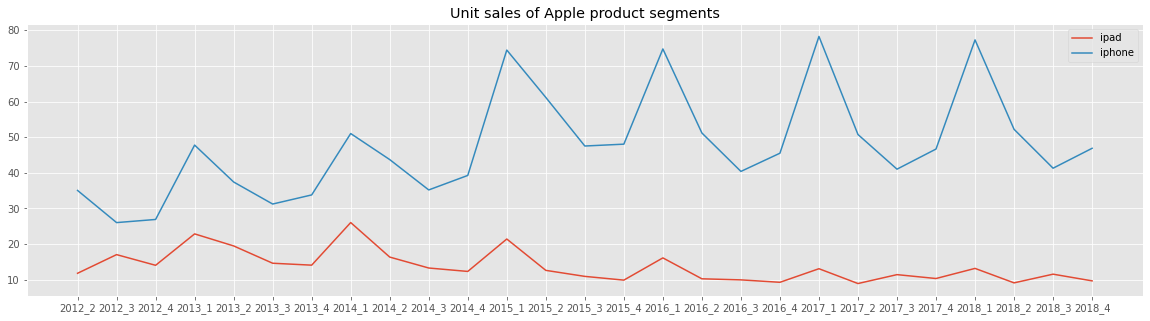

In [56]:
plt.figure(figsize =(20,5))
plt.plot(sales_tweets[sales_tweets['ipad']==1].set_index('QTR_IDX_SALES')['sales'])
plt.plot(sales_tweets[sales_tweets['iphone']==1].set_index('QTR_IDX_SALES')['sales'])
plt.legend(['ipad','iphone'])
plt.title("Unit sales of Apple product segments")

## Simple Linear Regression using aggregated metrics - without normalizing 

In [32]:
train = sales_tweets.QTR_IDX_SALES.unique()[:20]
test = sales_tweets.QTR_IDX_SALES.unique()[20:]

train = sales_tweets.set_index('QTR_IDX_SALES').loc[train].drop(['QTR_IDX_PREV', 'device'],axis=1)
test = sales_tweets.set_index('QTR_IDX_SALES').loc[test].drop(['QTR_IDX_PREV', 'device'],axis=1)

X_train, y_train = train.drop(['sales', 'sales_norm'], axis=1), train['sales']
X_test, y_test = test.drop(['sales', 'sales_norm'], axis=1), test['sales']

KeyError: "['sales_norm'] not found in axis"

In [148]:
import statsmodels.api as sm

In [149]:
model = sm.OLS(y_train,X_train)

In [150]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              20.69
Date:                Sun, 28 Mar 2021   Prob (F-statistic):                    2.87e-12
Time:                        22:54:59   Log-Likelihood:                         -190.48
No. Observations:                  60   AIC:                                      447.0
Df Residuals:                      27   BIC:                                      516.1
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
replyCount_sum              -4.3861      5.818     -0.754      0.457     -16.324       7.551
retweetCount_sum             0.2505      2.036      0.123      0.903      -3.926       4.427
likeCount_sum               -0.2928      0.652     -0.449      0.657      -1.631       1.046
quoteCount_sum              20.9552     34.621      0.605      0.550     -50.080      91.991
sentiment_vader_sum          6.0233     14.633      0.412      0.684     -24.000      36.047
sentiment_tfidf_sum       -108.1884    306.210     -0.353      0.727    -736.479     520.102
sentiment_countvect_sum     14.0198    187.259      0.075      0.941    -370.205     398.244
sentiment_bert_sum          24.7210     31.208      0.792      0.435     -39.312      88.754
replyCount_mean           3108.7791   4193.429      0.741      0.465   -5495.426    1.17e+04
retweetCount_mean         -187.2507   1468.548     -0.128      0.899   -3200.463    2825.961
likeCount_mean             228.3717    471.832      0.484      0.632    -739.748    1196.492
quoteCount_mean          -1.509e+04   2.49e+04     -0.605      0.550   -6.63e+04    3.61e+04
sentiment_vader_mean     -4328.2403   1.05e+04     -0.411      0.685    -2.6e+04    1.73e+04
sentiment_tfidf_mean      7.864e+04   2.21e+05      0.356      0.724   -3.74e+05    5.32e+05
sentiment_countvect_mean -9735.8704   1.35e+05     -0.072      0.943   -2.86e+05    2.67e+05
sentiment_bert_mean      -1.757e+04   2.25e+04     -0.781      0.442   -6.37e+04    2.86e+04
count                       -0.0521      0.065     -0.797      0.432      -0.186       0.082
vader_pos_count             -3.9737     15.805     -0.251      0.803     -36.403      28.456
bert_pos_count             -48.6092     45.213     -1.075      0.292    -141.378      44.159
tfidf_pos_count              0.7136     30.497      0.023      0.982     -61.862      63.289
countvect_pos_count         39.6401     29.069      1.364      0.184     -20.004      99.285
vader_pos_perc            2779.5243   1.14e+04      0.244      0.809   -2.06e+04    2.61e+04
bert_pos_perc             3.525e+04   3.26e+04      1.082      0.289   -3.16e+04    1.02e+05
tfidf_pos_perc            -315.6166    2.2e+04     -0.014      0.989   -4.54e+04    4.48e+04
countvect_pos_perc       -2.869e+04    2.1e+04     -1.368      0.183   -7.17e+04    1.43e+04
vader_neg_count             -9.9968     29.928     -0.334      0.741     -71.404      51.410
bert_neg_count              10.7564     60.039      0.179      0.859    -112.434     133.947
tfidf_neg_count             20.1364     20.050      1.004      0.324     -21.003      61.276
countvect_neg_count         -1.7196      6.748     -0.255      0.801     -15.565      12.126
vader_ne

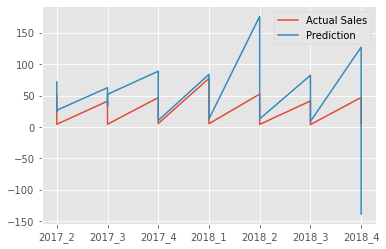

In [151]:
plt.style.use('ggplot')
plt.plot(y_test)
plt.plot(results.predict(X_test))
plt.legend(['Actual Sales', 'Prediction'])

In [152]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, results.predict(X_test),squared=False)

51.038168788340855

### iPhone

In [180]:
train = sales_tweets.QTR_IDX_SALES.unique()[:20]
test = sales_tweets.QTR_IDX_SALES.unique()[20:]

train = sales_tweets[sales_tweets['iphone']==1].set_index('QTR_IDX_SALES').loc[train].drop(['QTR_IDX_PREV', 'device'],axis=1)
test = sales_tweets[sales_tweets['iphone']==1].set_index('QTR_IDX_SALES').loc[test].drop(['QTR_IDX_PREV', 'device'],axis=1)

X_train, y_train = train.drop(['sales', 'sales_norm'], axis=1), train['sales']
X_test, y_test = test.drop(['sales', 'sales_norm'], axis=1), test['sales']

In [181]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\statsmodels\regression\linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2.701
Date:                Sun, 28 Mar 2021   Prob (F-statistic):              0.304
Time:                        23:03:15   Log-Likelihood:                -50.758
No. Observations:                  20   AIC:                             137.5
Df Residuals:                       2   BIC:                             155.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
replyCount_sum        -1.4576     13.131     -0.111      0.922     -57.954      55.038
retweetCount_sum       4.2522      3.177      1.338      0.313      -9.418      17.923
likeCount_sum         -0.0450      3.197     -0.014      0.990     -13.801      13.711
quoteCount_sum       -73.7463    266.995     -0.276      0.808   -1222.535    1075.042
replyCount_mean     1067.8404   9469.029      0.113      0.921   -3.97e+04    4.18e+04
retweetCount_mean  -3241.8417   2299.295     -1.410      0.294   -1.31e+04    6651.225
likeCount_mean        99.1745   2300.396      0.043      0.970   -9798.631    9996.980
quoteCount_mean     5.292e+04   1.92e+05      0.275      0.809   -7.75e+05    8.81e+05
count                 -0.5844      4.742     -0.123      0.913     -20.987      19.819
vader_pos_perc        86.6054    194.109      0.446      0.699    -748.578     921.789
bert_pos_perc        339.3626    410.215      0.827      0.495   -1425.649    2104.374
tfidf_pos_perc      -233.9650    517.577     -0.452      0.696   -2460.920    1992.990
countvect_pos_perc  -147.3216    597.041     -0.247      0.828   -2716.180    2421.537
vader_neg_perc      -428.3609    293.481     -1.460      0.282   -1691.108     834.386
bert_neg_perc        773.8346    544.267      1.422      0.291   -1567.956    3115.625
tfidf_neg_perc       -52.9026    352.859     -0.150      0.895   -1571.132    1465.326
countvect_neg_perc  -241.8459    423.612     -0.571      0.626   -2064.500    1580.808
iphone               421.0314   3395.121      0.124      0.913   -1.42e+04     1.5e+04
ipad                        0          0        nan        nan           0           0
==============================================================================
Omnibus:                        8.211   Durbin-Watson:                   2.352
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.963
Skew:                          -0.579   Prob(JB):                       0.0187
Kurtosis:                       5.866   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

RMSE: 209.35888814128637


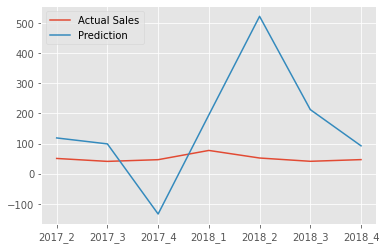

In [182]:
plt.plot(y_test)
plt.plot(results.predict(X_test))

print("RMSE:", mse(y_test, results.predict(X_test),squared=False))
plt.legend(['Actual Sales', 'Prediction'])
plt.show()


### iPad

In [183]:
train = sales_tweets.QTR_IDX_SALES.unique()[:20]
test = sales_tweets.QTR_IDX_SALES.unique()[20:]

train = sales_tweets[sales_tweets['ipad']==1].set_index('QTR_IDX_SALES').loc[train].drop(['QTR_IDX_PREV', 'device'],axis=1)
test = sales_tweets[sales_tweets['ipad']==1].set_index('QTR_IDX_SALES').loc[test].drop(['QTR_IDX_PREV', 'device'],axis=1)

X_train, y_train = train.drop(['sales', 'sales_norm'], axis=1), train['sales']
X_test, y_test = test.drop(['sales', 'sales_norm'], axis=1), test['sales']

In [184]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     10.26
Date:                Sun, 28 Mar 2021   Prob (F-statistic):             0.0924
Time:                        23:03:19   Log-Likelihood:                -13.702
No. Observations:                  20   AIC:                             63.40
Df Residuals:                       2   BIC:                             81.33
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
replyCount_sum        -3.7579      1.347     -2.789      0.108      -9.555       2.039
retweetCount_sum      -3.4940      0.524     -6.668      0.022      -5.749      -1.239
likeCount_sum         -0.0815      0.102     -0.797      0.509      -0.521       0.358
quoteCount_sum        -3.2123     10.421     -0.308      0.787     -48.052      41.628
replyCount_mean     2741.0088    979.989      2.797      0.108   -1475.544    6957.561
retweetCount_mean   2551.5915    380.424      6.707      0.022     914.757    4188.425
likeCount_mean        67.1807     75.732      0.887      0.469    -258.666     393.027
quoteCount_mean     2355.1312   7621.850      0.309      0.787   -3.04e+04    3.51e+04
count                  1.7619      0.463      3.805      0.063      -0.231       3.754
vader_pos_perc       199.3507     38.268      5.209      0.035      34.698     364.003
bert_pos_perc         73.5933     60.670      1.213      0.349    -187.449     334.636
tfidf_pos_perc         3.3747    118.640      0.028      0.980    -507.092     513.842
countvect_pos_perc   164.8716    161.118      1.023      0.414    -528.363     858.106
vader_neg_perc       161.7017     66.843      2.419      0.137    -125.900     449.304
bert_neg_perc        -86.4287    111.763     -0.773      0.520    -567.308     394.451
tfidf_neg_perc       207.2314     62.466      3.317      0.080     -61.539     476.002
countvect_neg_perc  -120.9065     49.541     -2.441      0.135    -334.066      92.253
iphone                      0          0        nan        nan           0           0
ipad               -1446.4714    361.886     -3.997      0.057   -3003.541     110.598
==============================================================================
Omnibus:                        8.305   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.786
Skew:                           1.231   Prob(JB):                       0.0554
Kurtosis:                       3.938   Cond. No.                     8.55e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-41. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

RMSE: 0.4800689860930165


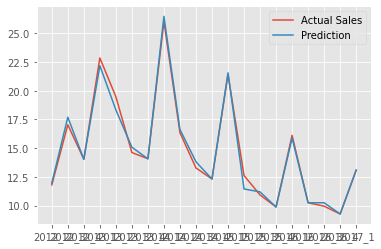

In [185]:
plt.plot(y_train)
plt.plot(results.predict(X_train))

print("RMSE:", mse(y_train, results.predict(X_train),squared=False))
plt.legend(['Actual Sales', 'Prediction'])
plt.show()


RMSE: 37.6676301112014


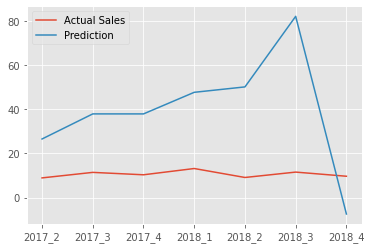

In [186]:
plt.plot(y_test)
plt.plot(results.predict(X_test))

print("RMSE:", mse(y_test, results.predict(X_test),squared=False))
plt.legend(['Actual Sales', 'Prediction'])
plt.show()


### Mac

In [160]:
train = sales_tweets.QTR_IDX_SALES.unique()[:20]
test = sales_tweets.QTR_IDX_SALES.unique()[20:]

train = sales_tweets[(sales_tweets['ipad']==0) & (sales_tweets['iphone']==0)].set_index('QTR_IDX_SALES').loc[train].drop(['QTR_IDX_PREV', 'device'],axis=1)
test = sales_tweets[(sales_tweets['ipad']==0) & (sales_tweets['iphone']==0)].set_index('QTR_IDX_SALES').loc[test].drop(['QTR_IDX_PREV', 'device'],axis=1)

X_train, y_train = train.drop(['sales', 'sales_norm'], axis=1), train['sales']
X_test, y_test = test.drop(['sales', 'sales_norm'], axis=1), test['sales']

In [161]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                 -1.429
Method:                 Least Squares   F-statistic:                    0.3790
Date:                Sun, 28 Mar 2021   Prob (F-statistic):              0.878
Time:                        22:55:46   Log-Likelihood:                 2.5586
No. Observations:                  20   AIC:                             32.88
Df Residuals:                       1   BIC:                             51.80
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
replyCount_sum               0.0543      1.389      0.039      0.975     -17.590      17.698
retweetCount_sum            -0.0968      1.016     -0.095      0.940     -13.010      12.817
likeCount_sum               -0.0044      0.141     -0.031      0.980      -1.798       1.789
quoteCount_sum              -0.0795      0.501     -0.158      0.900      -6.452       6.293
sentiment_vader_sum         -0.1662      0.591     -0.281      0.826      -7.679       7.346
sentiment_tfidf_sum      -8.088e-10   9.88e-09     -0.082      0.948   -1.26e-07    1.25e-07
sentiment_countvect_sum   1.003e-10   2.76e-09      0.036      0.977   -3.49e-08    3.51e-08
sentiment_bert_sum           0.0008      0.562      0.001      0.999      -7.143       7.145
replyCount_mean            -39.3086    994.065     -0.040      0.975   -1.27e+04    1.26e+04
retweetCount_mean           69.3682    729.454      0.095      0.940   -9199.223    9337.959
likeCount_mean               4.3030    106.339      0.040      0.974   -1346.858    1355.464
quoteCount_mean             71.3005    385.016      0.185      0.883   -4820.795    4963.396
sentiment_vader_mean       110.7960    436.216      0.254      0.842   -5431.856    5653.448
sentiment_tfidf_mean      2.408e-10   3.23e-09      0.075      0.953   -4.08e-08    4.12e-08
sentiment_countvect_mean  4.477e-13   8.16e-12      0.055      0.965   -1.03e-10    1.04e-10
sentiment_bert_mean         22.0851    439.233      0.050      0.968   -5558.898    5603.068
count                        0.0043      0.118      0.036      0.977      -1.495       1.504
vader_pos_count             -0.0743      0.575     -0.129      0.918      -7.386       7.238
bert_pos_count              -0.0848      0.251     -0.338      0.793      -3.273       3.103
tfidf_pos_count              0.0711      0.526      0.135      0.915      -6.615       6.757
countvect_pos_count          0.0551      0.555      0.099      0.937      -6.997       7.108
vader_pos_perc              56.8026    324.715      0.175      0.890   -4069.092    4182.697
bert_pos_perc               44.5290    254.832      0.175      0.890   -3193.414    3282.472
tfidf_pos_perc             -46.6162    379.063     -0.123      0.922   -4863.068    4769.836
countvect_pos_perc         -23.2297    202.823     -0.115      0.927   -2600.338    2553.878
vader_neg_count              0.0919      0.591      0.155      0.902      -7.421       7.605
bert_neg_count               0.0464      0.404      0.115      0.927      -5.084       5.177
tfidf_neg_count             -0.0148      0.770     -0.019      0.988      -9.793       9.763
countvect_neg_count          0.0811      0.339      0.239      0.850      -4.224       4.386
vader_neg_perc             -53.9934    329.088     -0.164      0.896   -4235.447    4127.460
bert_neg_perc 

RMSE: 4.5540864418549845


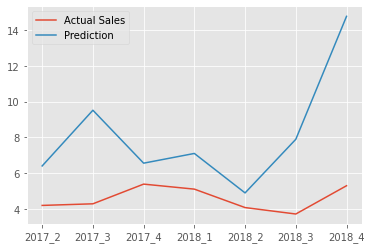

In [162]:
plt.plot(y_test)
plt.plot(results.predict(X_test))

print("RMSE:", mse(y_test, results.predict(X_test),squared=False))
plt.legend(['Actual Sales', 'Prediction'])
plt.show()


## Simple Linear Regression using aggregated metrics - with normalizing SALES

In [116]:
sales_tweets['sales_norm'] = sales_tweets.groupby('device').sales.transform(lambda x: (x - x.mean()) / x.std())

In [125]:
sales_tweets.columns

Index(['sales', 'device', 'QTR_IDX_SALES', 'QTR_IDX_PREV', 'replyCount_sum',
       'retweetCount_sum', 'likeCount_sum', 'quoteCount_sum',
       'sentiment_vader_sum', 'sentiment_tfidf_sum', 'sentiment_countvect_sum',
       'sentiment_bert_sum', 'replyCount_mean', 'retweetCount_mean',
       'likeCount_mean', 'quoteCount_mean', 'sentiment_vader_mean',
       'sentiment_tfidf_mean', 'sentiment_countvect_mean',
       'sentiment_bert_mean', 'count', 'vader_pos_count', 'bert_pos_count',
       'tfidf_pos_count', 'countvect_pos_count', 'vader_pos_perc',
       'bert_pos_perc', 'tfidf_pos_perc', 'countvect_pos_perc',
       'vader_neg_count', 'bert_neg_count', 'tfidf_neg_count',
       'countvect_neg_count', 'vader_neg_perc', 'bert_neg_perc',
       'tfidf_neg_perc', 'countvect_neg_perc', 'iphone', 'ipad', 'sales_norm'],
      dtype='object')

In [171]:
sales_tweets = sales_tweets[['sales', 'device', 'QTR_IDX_SALES', 'QTR_IDX_PREV', 'replyCount_sum',
       'retweetCount_sum', 'likeCount_sum', 'quoteCount_sum',
       'replyCount_mean', 'retweetCount_mean',
       'likeCount_mean', 'quoteCount_mean', 'count', 'vader_pos_perc',
       'bert_pos_perc', 'tfidf_pos_perc', 'countvect_pos_perc','vader_neg_perc', 'bert_neg_perc',
       'tfidf_neg_perc', 'countvect_neg_perc', 'iphone', 'ipad', 'sales_norm']]

In [172]:
train = sales_tweets.QTR_IDX_SALES.unique()[:20]
test = sales_tweets.QTR_IDX_SALES.unique()[20:]

train = sales_tweets[sales_tweets['ipad']==1].set_index('QTR_IDX_SALES').loc[train].drop(['QTR_IDX_PREV', 'device'],axis=1)
test = sales_tweets[sales_tweets['ipad']==1].set_index('QTR_IDX_SALES').loc[test].drop(['QTR_IDX_PREV', 'device'],axis=1)

X_train, y_train = train.drop(['sales','sales_norm'], axis=1), train['sales_norm']
X_test, y_test = test.drop(['sales','sales_norm'], axis=1), test['sales_norm']

In [173]:
X_train

,replyCount_sum,retweetCount_sum,likeCount_sum,quoteCount_sum,replyCount_mean,retweetCount_mean,likeCount_mean,quoteCount_mean,count,vader_pos_perc,bert_pos_perc,tfidf_pos_perc,countvect_pos_perc,vader_neg_perc,bert_neg_perc,tfidf_neg_perc,countvect_neg_perc,iphone,ipad
QTR_IDX_SALES,,,,,,,,,,,,,,,,,,,
2012_2,406.0,41.0,60.0,0.0,0.563889,0.056944,0.083333,0.000000,720,0.447222,0.208333,0.176389,0.186111,0.183333,0.165278,0.166667,0.152778,0,1
2012_3,227.0,43.0,30.0,0.0,0.315278,0.059722,0.041667,0.000000,720,0.469444,0.191667,0.186111,0.202778,0.194444,0.179167,0.191667,0.127778,0,1
2012_4,266.0,103.0,48.0,0.0,0.350000,0.135526,0.063158,0.000000,760,0.459211,0.223684,0.190789,0.202632,0.197368,0.203947,0.206579,0.196053,0,1
2013_1,190.0,97.0,61.0,0.0,0.263889,0.134722,0.084722,0.000000,720,0.443056,0.222222,0.186111,0.205556,0.245833,0.212500,0.215278,0.165278,0,1
2013_2,211.0,185.0,199.0,0.0,0.293463,0.257302,0.276773,0.000000,719,0.433936,0.215577,0.189152,0.197497,0.211405,0.205841,0.208623,0.175243,0,1
2013_3,192.0,64.0,107.0,0.0,0.266667,0.088889,0.148611,0.000000,720,0.400000,0.206944,0.204167,0.216667,0.256944,0.215278,0.225000,0.180556,0,1
2013_4,217.0,74.0,233.0,0.0,0.285526,0.097368,0.306579,0.000000,760,0.388158,0.184211,0.169737,0.171053,0.242105,0.225000,0.228947,0.198684,0,1
2014_1,215.0,265.0,289.0,0.0,0.298611,0.368056,0.401389,0.000000,720,0.419444,0.220833,0.183333,0.193056,0.225000,0.209722,0.230556,0.175000,0,1
2014_2,187.0,75.0,220.0,0.0,0.259722,0.104167,0.305556,0.000000,720,0.434722,0.245833,0.163889,0.172222,0.241667,0.227778,0.265278,0.240278,0,1


iPads
RMSE: 0.4800689860930165
RMSE: 37.6676301112014


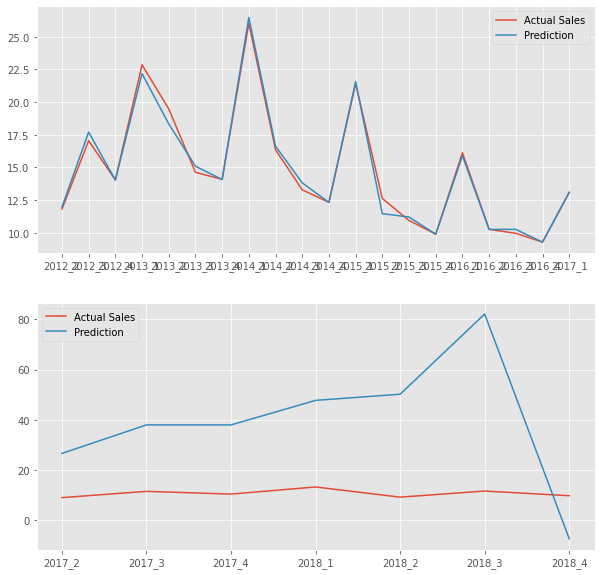

C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     10.26
Date:                Sun, 28 Mar 2021   Prob (F-statistic):             0.0924
Time:                        23:05:40   Log-Likelihood:                -13.702
No. Observations:                  20   AIC:                             63.40
Df Residuals:                       2   BIC:                             81.33
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
replyCount_sum        -3.7579      1.347     -2.789      0.108      -9.555       2.039
retweetCount_sum      -3.4940      0.524     -6.668      0.022      -5.749      -1.239
likeCount_sum         -0.0815      0.102     -0.797      0.509      -0.521       0.358
quoteCount_sum        -3.2123     10.421     -0.308      0.787     -48.052      41.628
replyCount_mean     2741.0088    979.989      2.797      0.108   -1475.544    6957.561
retweetCount_mean   2551.5915    380.424      6.707      0.022     914.757    4188.425
likeCount_mean        67.1807     75.732      0.887      0.469    -258.666     393.027
quoteCount_mean     2355.1312   7621.850      0.309      0.787   -3.04e+04    3.51e+04
count                  1.7619      0.463      3.805      0.063      -0.231       3.754
vader_pos_perc       199.3507     38.268      5.209      0.035      34.698     364.003
bert_pos_perc         73.5933     60.670      1.213      0.349    -187.449     334.636
tfidf_pos_perc         3.3747    118.640      0.028      0.980    -507.092     513.842
countvect_pos_perc   164.8716    161.118      1.023      0.414    -528.363     858.106
vader_neg_perc       161.7017     66.843      2.419      0.137    -125.900     449.304
bert_neg_perc        -86.4287    111.763     -0.773      0.520    -567.308     394.451
tfidf_neg_perc       207.2314     62.466      3.317      0.080     -61.539     476.002
countvect_neg_perc  -120.9065     49.541     -2.441      0.135    -334.066      92.253
iphone                      0          0        nan        nan           0           0
ipad               -1446.4714    361.886     -3.997      0.057   -3003.541     110.598
==============================================================================
Omnibus:                        8.305   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.786
Skew:                           1.231   Prob(JB):                       0.0554
Kurtosis:                       3.938   Cond. No.                     8.55e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-41. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [190]:
model = sm.OLS(y_train,X_train)
results = model.fit()

print("iPads")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

plt.subplot(2,1,1)

plt.plot(y_train)
plt.plot(results.predict(X_train))

print("RMSE:", mse(y_train, results.predict(X_train),squared=False))
plt.legend(['Actual Sales', 'Prediction'])


plt.subplot(2,1,2)

plt.plot(y_test)
plt.plot(results.predict(X_test))

print("RMSE:", mse(y_test, results.predict(X_test),squared=False))
plt.legend(['Actual Sales', 'Prediction'])
plt.show()

results.summary()

In [175]:

train = sales_tweets.QTR_IDX_SALES.unique()[:20]
test = sales_tweets.QTR_IDX_SALES.unique()[20:]

train = sales_tweets[(sales_tweets['ipad']==0) & (sales_tweets['iphone']==0)].set_index('QTR_IDX_SALES').loc[train].drop(['QTR_IDX_PREV', 'device'],axis=1)
test = sales_tweets[(sales_tweets['ipad']==0) & (sales_tweets['iphone']==0)].set_index('QTR_IDX_SALES').loc[test].drop(['QTR_IDX_PREV', 'device'],axis=1)

X_train, y_train = train.drop(['sales','sales_norm'], axis=1), train['sales_norm']
X_test, y_test = test.drop(['sales','sales_norm'], axis=1), test['sales_norm']

Macs
RMSE: 0.37683600103229664
RMSE: 5.4669132144751975


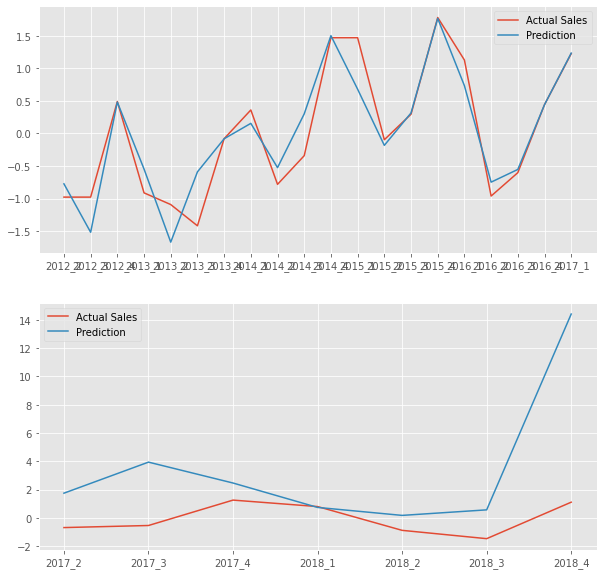

C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\statsmodels\regression\linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\reonh\miniconda3\envs\qntdev\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sales_norm   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.9959
Date:                Sun, 28 Mar 2021   Prob (F-statistic):                       0.585
Time:                        23:01:07   Log-Likelihood:                         -8.8599
No. Observations:                  20   AIC:                                      51.72
Df Residuals:                       3   BIC:                                      68.65
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
replyCount_sum         0.1014      0.140      0.724      0.522      -0.344       0.547
retweetCount_sum      -0.6569      1.590     -0.413      0.707      -5.716       4.402
likeCount_sum          0.0697      0.123      0.565      0.611      -0.323       0.462
quoteCount_sum        -1.7428      2.956     -0.589      0.597     -11.152       7.666
replyCount_mean      -74.8257    105.178     -0.711      0.528    -409.550     259.898
retweetCount_mean    475.4191   1141.338      0.417      0.705   -3156.826    4107.664
likeCount_mean       -49.9304     89.845     -0.556      0.617    -335.857     235.996
quoteCount_mean     1291.9405   2189.974      0.590      0.597   -5677.535    8261.416
count                  0.0018      0.033      0.055      0.959      -0.104       0.108
vader_pos_perc        -9.8572     35.568     -0.277      0.800    -123.051     103.337
bert_pos_perc          4.5870     35.943      0.128      0.907    -109.798     118.973
tfidf_pos_perc        27.3076     55.020      0.496      0.654    -147.791     202.407
countvect_pos_perc   -18.1113     73.790     -0.245      0.822    -252.944     216.721
vader_neg_perc        15.4277     37.881      0.407      0.711    -105.125     135.981
bert_neg_perc        -31.2561     25.548     -1.223      0.309    -112.562      50.050
tfidf_neg_perc        -4.3742     36.855     -0.119      0.913    -121.662     112.913
countvect_neg_perc    15.8408     26.234      0.604      0.589     -67.646      99.328
iphone                      0          0        nan        nan           0           0
ipad                        0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.628   Durbin-Watson:                   2.473
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.022
Skew:                          -0.002   Prob(JB):                        0.989
Kurtosis:                       3.161   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [176]:
model = sm.OLS(y_train,X_train)
results = model.fit()

print("Macs")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

plt.subplot(2,1,1)

plt.plot(y_train)
plt.plot(results.predict(X_train))

print("RMSE:", mse(y_train, results.predict(X_train),squared=False))
plt.legend(['Actual Sales', 'Prediction'])


plt.subplot(2,1,2)

plt.plot(y_test)
plt.plot(results.predict(X_test))

print("RMSE:", mse(y_test, results.predict(X_test),squared=False))
plt.legend(['Actual Sales', 'Prediction'])
plt.show()

results.summary()


In [177]:
train = sales_tweets.QTR_IDX_SALES.unique()[:20]
test = sales_tweets.QTR_IDX_SALES.unique()[20:]

train = sales_tweets[sales_tweets['iphone']==1].set_index('QTR_IDX_SALES').loc[train].drop(['QTR_IDX_PREV', 'device'],axis=1)
test = sales_tweets[sales_tweets['iphone']==1].set_index('QTR_IDX_SALES').loc[test].drop(['QTR_IDX_PREV', 'device'],axis=1)

X_train, y_train = train.drop(['sales','sales_norm'], axis=1), train['sales_norm']
X_test, y_test = test.drop(['sales','sales_norm'], axis=1), test['sales_norm']

iPhone Sales
RMSE: 0.21018473256815037
RMSE: 14.372307080575853


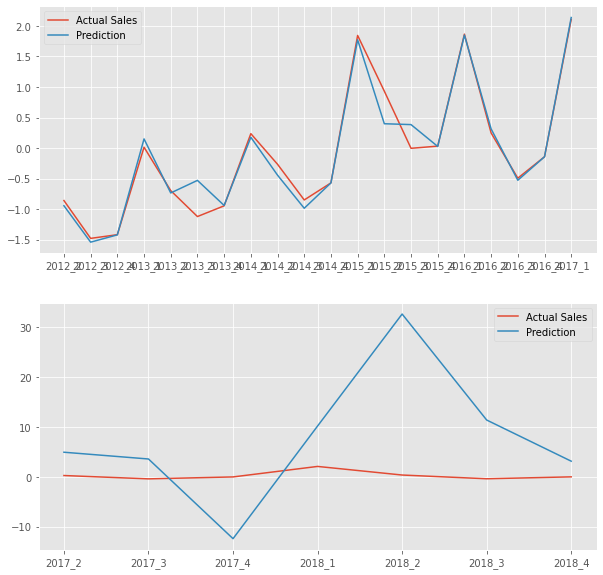

In [179]:
model = sm.OLS(y_train,X_train)
results = model.fit()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

print("iPhone Sales")

plt.subplot(2,1,1)

plt.plot(y_train)
plt.plot(results.predict(X_train))

print("RMSE:", mse(y_train, results.predict(X_train),squared=False))
plt.legend(['Actual Sales', 'Prediction'])


plt.subplot(2,1,2)

plt.plot(y_test)
plt.plot(results.predict(X_test))

print("RMSE:", mse(y_test, results.predict(X_test),squared=False))
plt.legend(['Actual Sales', 'Prediction'])
plt.show()


In [75]:
sales_tweets.to_csv('sales_tweets.csv')

## Add in Text Analysis

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [339]:
train = ['2012_1','2012_2', '2012_3', '2012_4', '2013_1', '2013_2', '2013_3',
       '2013_4', '2014_1', '2014_2', '2014_3', '2014_4', '2015_1',
       '2015_2', '2015_3', '2015_4', '2016_1', '2016_2', '2016_3',
       '2016_4']
train = tweets[tweets.QTR_IDX.isin(list(train))]

test = ['2017_1', '2017_2', '2017_3', '2017_4', '2018_1', '2018_2', '2018_3',
       '2018_4']
test = tweets[tweets.QTR_IDX.isin(list(test))]

In [340]:
traincontent = train.content.apply(lambda x: " ".join([y if not "@" in y else "" for y in x.split(" ")]))
testcontent = test.content.apply(lambda x: " ".join([y if not "@" in y else "" for y in x.split(" ")]))

In [341]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2),strip_accents='ascii',min_df=0.012)
x_train_dtm = vect.fit_transform(traincontent)
x_test_dtm = vect.transform(testcontent)

In [342]:
x_train_dtm = pd.DataFrame(x_train_dtm.toarray(), columns = vect.get_feature_names())
x_test_dtm = pd.DataFrame(x_test_dtm.toarray(), columns = vect.get_feature_names())

In [343]:
x_train_dtm['QTR_IDX'] = train.reset_index()['QTR_IDX']
x_test_dtm['QTR_IDX'] = test.reset_index()['QTR_IDX']

x_train_dtm['device'] = train.reset_index()['device']
x_test_dtm['device'] = test.reset_index()['device']

In [344]:
tweets_agg_stats

replyCount_sum  retweetCount_sum  likeCount_sum  \
QTR_IDX device                                                    
2012_1  ipad               406                41             60   
        iphone             376               116             12   
        mac                330                33              8   
2012_2  ipad               227                43             30   
        iphone             240                77             29   
...                        ...               ...            ...   
2018_3  iphone             435               192           3232   
        mac               1200               274           5655   
2018_4  ipad               300                72           1242   
        iphone             404               166           1978   
        mac                436               517           2444   

                quoteCount_sum  replyCount_mean  retweetCount_mean  \
QTR_IDX device                                                       
2012_1  ipad                 0         0.563889           0.056944   
        iphone               0         0.522222           0.161111   
        mac                  0         0.458333           0.045833   
2012_2  ipad                 0         0.315278           0.059722   
        iphone               0         0.333333           0.106944   
...                        ...              ...                ...   
2018_3  iphone              45         0.572368           0.252632   
        mac                 74         1.578947           0.360526   
2018_4  ipad                24         0.416667           0.100000   
        iphone              31         0.561111           0.230556   
        mac                 42         0.605556           0.718056   

                likeCount_mean  quoteCount_mean  
QTR_IDX device                                   
2012_1  ipad          0.083333         0.000000  
        iphone        0.016667         0.000000  
        mac           0.011111         0.000000  
2012_2  ipad          0.041667         0.000000  
        iphone        0.040278         0.000000  
...                        ...              ...  
2018_3  iphone        4.252632         0.059211  
        mac           7.440789         0.097368  
2018_4  ipad          1.725000         0.033333  
        iphone        2.747222         0.043056  
        mac           3.394444         0.058333  

[84 rows x 8 columns]

In [345]:
x_content = pd.concat([x_train_dtm.groupby(['QTR_IDX', 'device']).sum(), x_test_dtm.groupby(['QTR_IDX', 'device']).sum()])

In [346]:
x_content = pd.concat([tweets_agg_stats,x_content], axis = 1)

In [347]:
x_content

replyCount_sum  retweetCount_sum  likeCount_sum  \
QTR_IDX device                                                    
2012_1  ipad               406                41             60   
        iphone             376               116             12   
        mac                330                33              8   
2012_2  ipad               227                43             30   
        iphone             240                77             29   
...                        ...               ...            ...   
2018_3  iphone             435               192           3232   
        mac               1200               274           5655   
2018_4  ipad               300                72           1242   
        iphone             404               166           1978   
        mac                436               517           2444   

                quoteCount_sum  replyCount_mean  retweetCount_mean  \
QTR_IDX device                                                       
2012_1  ipad                 0         0.563889           0.056944   
        iphone               0         0.522222           0.161111   
        mac                  0         0.458333           0.045833   
2012_2  ipad                 0         0.315278           0.059722   
        iphone               0         0.333333           0.106944   
...                        ...              ...                ...   
2018_3  iphone              45         0.572368           0.252632   
        mac                 74         1.578947           0.360526   
2018_4  ipad                24         0.416667           0.100000   
        iphone              31         0.561111           0.230556   
        mac                 42         0.605556           0.718056   

                likeCount_mean  quoteCount_mean        air        amp  ...  \
QTR_IDX device                                                         ...   
2012_1  ipad          0.083333         0.000000   2.204830   3.089086  ...   
        iphone        0.016667         0.000000   0.000000   3.454605  ...   
        mac           0.011111         0.000000  44.493688   5.623619  ...   
2012_2  ipad          0.041667         0.000000   0.000000  13.501097  ...   
        iphone        0.040278         0.000000   0.000000  12.888714  ...   
...                        ...              ...        ...        ...  ...   
2018_3  iphone        4.252632         0.059211   0.382951   9.169014  ...   
        mac           7.440789         0.097368  31.940552  15.860235  ...   
2018_4  ipad          1.725000         0.033333   1.635662  14.238325  ...   
        iphone        2.747222         0.043056   0.438425  12.259268  ...   
        mac           3.394444         0.058333  39.638672   7.105868  ...   

                    today    twitter        use      using         ve  \
QTR_IDX device                                                          
2012_1  ipad     9.693218  17.678506  11.690257   7.904635   4.609313   
        iphone   5.749564  13.920214  10.324906   2.810192   5.269649   
        mac      3.747536   3.846925   8.762068   8.168668  10.618932   
2012_2  ipad     8.296857  17.341486  17.996750   9.758439   5.640236   
        iphone   5.596263  10.450692   9.016114   4.893779   6.658994   
...                   ...        ...        ...        ...        ...   
2018_3  iphone  10.823365   5.665163  13.410329  15.118684   4.103719   
        mac     15.312642   2.303157  27.175285  15.244803   6.356780   
2018_4  ipad     7.147439   3.606555  32.779506  11.277674  11.369310   
        iphone  10.450239   9.257182   8.866135  10.839512   3.791053   
        mac     12.362694   0.000000  26.532488   8.851819   2.794420   

                     want      watch        win       work       year  
QTR_IDX device                                                         
2012_1  ipad    26.308857   3.814744  13.952529   4.146075   5.507506  
        iphone  15.648133   0.744266   2.068734   3.

In [348]:
sales_tweets = sales_long.merge(x_content.reset_index(), left_on= ('QTR_IDX_PREV','device'), right_on = ('QTR_IDX','device'))

In [349]:
sales_tweets['iphone'] = np.where(sales_tweets['device'] == 'iphone',1,0)
sales_tweets['ipad'] = np.where(sales_tweets['device'] == 'ipad',1,0)

In [350]:
train = sales_tweets.QTR_IDX_SALES.unique()[:20]
test = sales_tweets.QTR_IDX_SALES.unique()[20:]

train = sales_tweets.set_index('QTR_IDX_SALES').loc[train].drop(['QTR_IDX_PREV', 'device','QTR_IDX'],axis=1)
test = sales_tweets.set_index('QTR_IDX_SALES').loc[test].drop(['QTR_IDX_PREV', 'device','QTR_IDX'],axis=1)

X_train, y_train = train.drop('sales', axis=1), train['sales']
X_test, y_test = test.drop('sales', axis=1), test['sales']

In [351]:
model = sm.OLS(y_train,X_train)

In [352]:
results = model.fit()
results.summary()

c:\users\reonh\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\users\reonh\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1729: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
c:\users\reonh\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 21 Mar 2021   Prob (F-statistic):                nan
Time:                        01:20:24   Log-Likelihood:                 1667.6
No. Observations:                  60   AIC:                            -3215.
Df Residuals:                       0   BIC:                            -3090.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
replyCount_sum        0.0644        inf          0        nan         nan         nan
retweetCount_sum     -0.0149        inf         -0        nan         nan         nan
likeCount_sum         0.0010        inf          0        nan         nan         nan
quoteCount_sum       -0.2246        inf         -0        nan         nan         nan
replyCount_mean      -0.0007        inf         -0        nan         nan         nan
retweetCount_mean     0.0060        inf          0        nan         nan         nan
likeCount_mean        0.0050        inf          0        nan         nan         nan
quoteCount_mean      -0.0013        inf         -0        nan         nan         nan
air                  -0.3439        inf         -0        nan         nan         nan
amp                   0.1744        inf          0        nan         nan         nan
android               0.7413        inf          0        nan         nan         nan
app                   0.3665        inf          0        nan         nan         nan
apple                 0.0786        inf          0        nan         nan         nan
better               -0.3311        inf         -0        nan         nan         nan
buy                   0.0603        inf          0        nan         nan         nan
case                 -0.2090        inf         -0        nan         nan         nan
charger              -0.1585        inf         -0        nan         nan         nan
day                   0.2053        inf          0        nan         nan         nan
did                   0.6920        inf          0        nan         nan         nan
does                  1.2096        inf          0        nan         nan         nan
don                   0.2737        inf          0        nan         nan         nan
finally               0.4280        inf          0        nan         nan         nan
getting               0.8497        inf          0        nan         nan         nan
going                 0.5226        inf          0        nan         nan         nan
good                 -0.4080        inf         -0        nan         nan         nan
got                   0.5156        inf          0        nan         nan         nan
got iphone            0.4987        inf          0        nan         nan         nan
im                   -4.2314        inf         -0        nan         nan         nan
ipad                 -0.0224        inf         -0        nan         nan         nan
ipad mini             0.8265        inf          0        nan         nan         nan
iphone                0.1066        inf          0        nan         nan         nan
iphone ipad           0.3958        inf          0        nan         nan         nan
ipod                 -0.7291        inf         -0        nan         nan

In [353]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, results.predict(X_test),squared=False)

80.36309710404927